In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.tsv', sep='\t')
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
import preprocess_kgptalkie as kgptalkie

In [4]:
df['wordcounts'] =  df['message'].apply(lambda x: kgptalkie.get_wordcounts(x))
df['charcounts'] = df['message'].apply(lambda x: kgptalkie.get_charcounts(x))

df['avg_wordlength'] = df['message'].apply(lambda x: kgptalkie.get_avg_wordlength(x))
df['stop_wrodcount'] = df['message'].apply(lambda x: kgptalkie.get_stopwords_counts(x))

df['digit_count'] = df['message'].apply(lambda x: kgptalkie.get_digit_counts(x))
df['uppercase_count'] = df['message'].apply(lambda x: kgptalkie.get_uppercase_counts(x))
df

,label,message,wordcounts,charcounts,avg_wordlength,stop_wrodcount,digit_count,uppercase_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,92,4.600000,4,4,0
1,ham,Ok lar... Joking wif u oni...,6,24,4.000000,0,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128,4.571429,5,6,2
3,ham,U dun say so early hor... U c already then say...,11,39,3.545455,4,2,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,49,3.769231,6,1,1
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,131,4.366667,9,12,2
5568,ham,Will ü b going to esplanade fr home?,8,29,3.625000,1,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",10,48,4.800000,4,3,0
5570,ham,The guy did some bitching but I acted like i'd...,26,100,3.846154,14,0,1


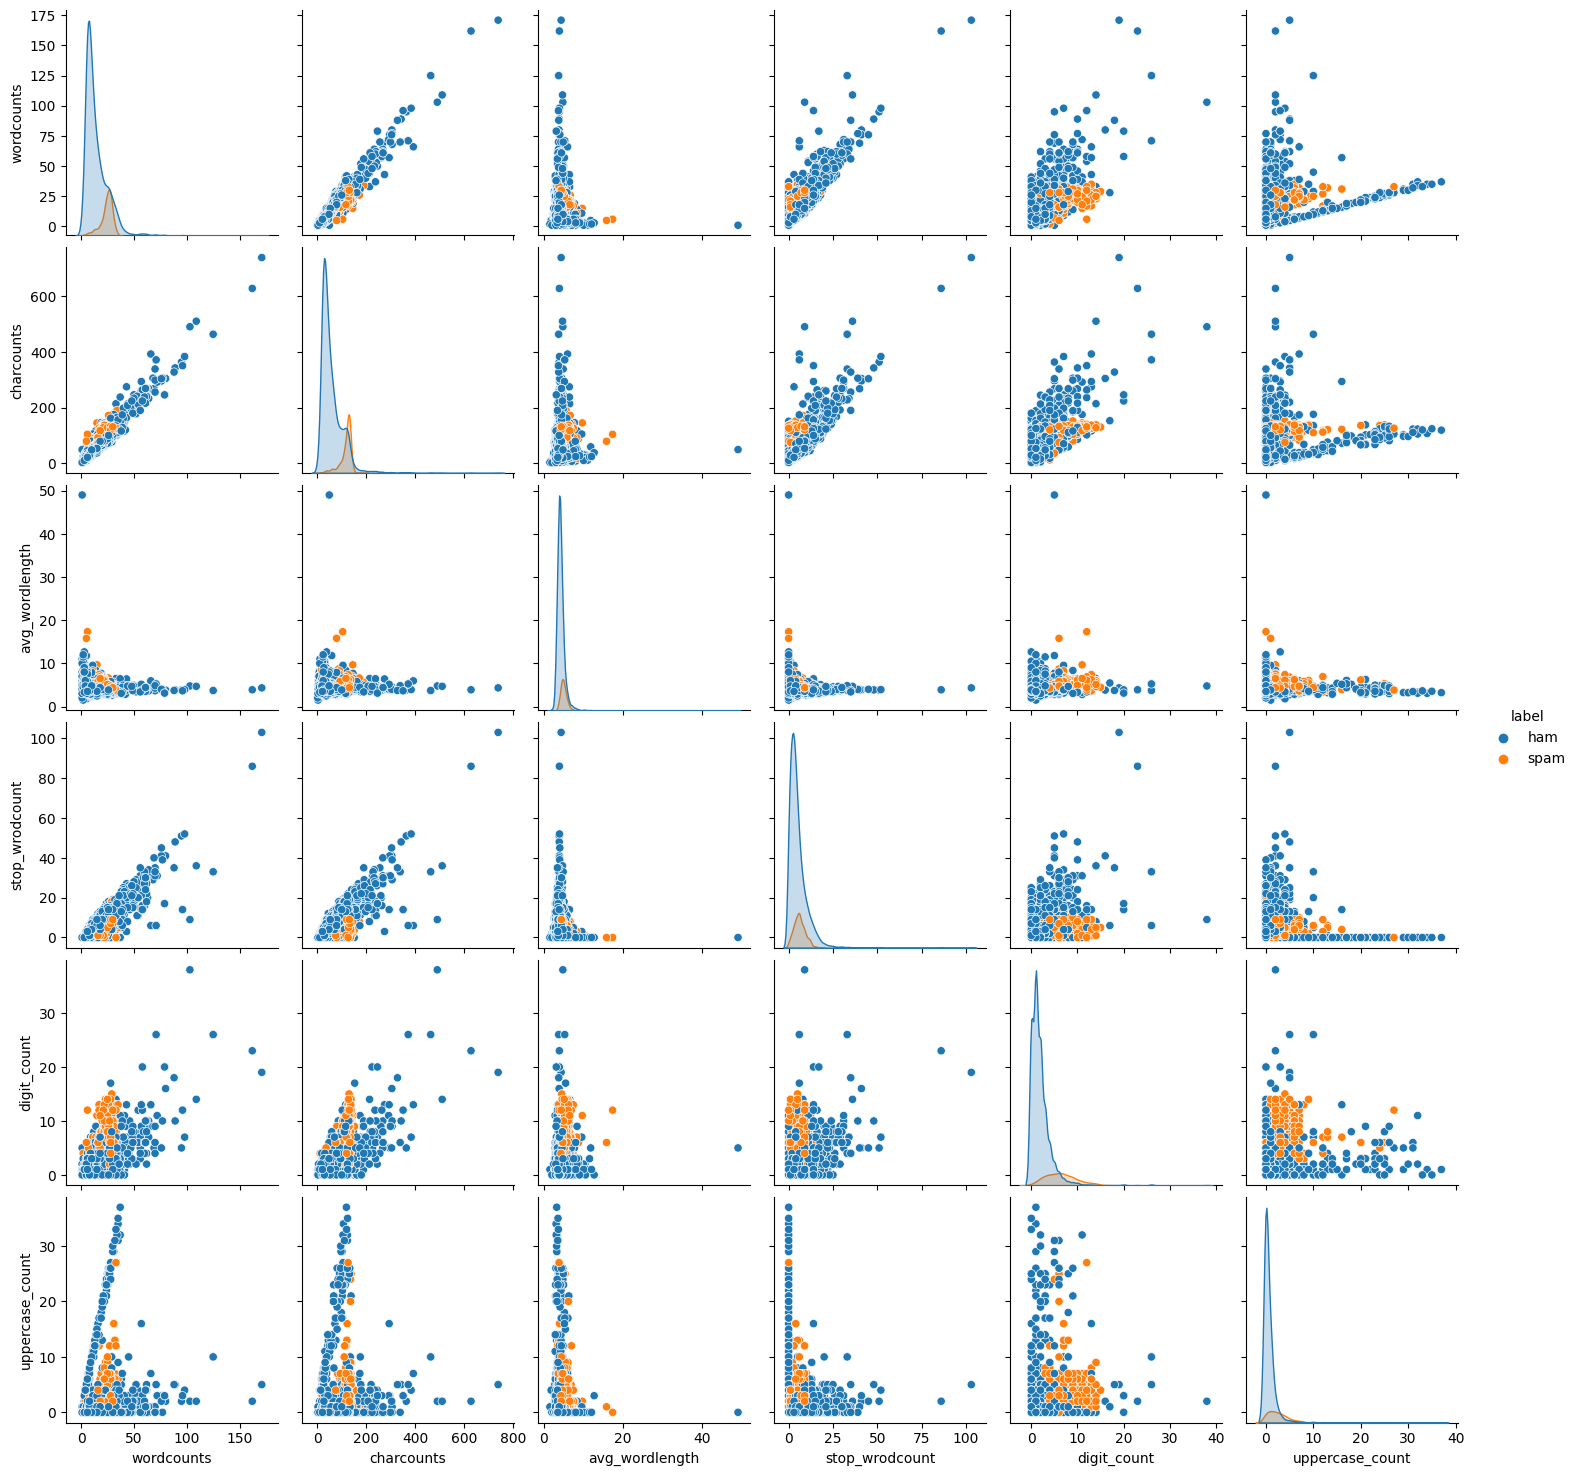

In [5]:
sns.pairplot(df, hue= 'label')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=0, stratify=df['label'])

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svc = LinearSVC(dual= 'auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.97      0.88      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [9]:
text = ['hey whassup?']
text = tfidf.transform(text)

svc.predict(text)

array(['ham'], dtype=object)

In [10]:
text = ['you have won tickets to the USA this summer']
text = tfidf.transform(text)

svc.predict(text)

array(['spam'], dtype=object)

In [12]:
text = ['i am sending you tickets for USA']
text = tfidf.transform(text)

svc.predict(text)

array(['ham'], dtype=object)